In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

ones_frame = pd.DataFrame(np.ones((20000, 1)))
df_data_x = pd.read_csv("nuclear_x.csv", header=None)
df_data_x.columns = [1, 2]
df_data_x = pd.concat([ones_frame, df_data_x], axis=1)
df_data_y = pd.read_csv("nuclear_y.csv", header=None)
df_data_y.columns = [3]
df_data = pd.concat([df_data_x, df_data_y], axis=1)
data_size = 20000
steps = 20
theta = np.random.normal(0, 1, 3)
lam = 0.001
df_data = df_data.head(data_size)

data_rgb = df_data.apply(lambda row: 'red' if row[3] == -1 else 'green', axis=1).values


def calculate_loss():
    j = df_data.apply(lambda rv: np.max([0, 1 - rv[3] * np.dot(theta_ssg, rv[:-1])]), axis=1).sum()
    return j / data_size + lam / 2 * np.dot(theta_ssg[1:], theta_ssg[1:])

theta_ssg = np.random.normal(0, 1, 3)
lam = 0.001
iterations = steps * data_size


def get_stochastic_subg():
    stochastic_subg = 0
    row = df_data.iloc[np.random.randint(0, data_size)]
    theta_wo_bias = np.copy(theta_ssg)
    theta_wo_bias[0] = 0
    if 1 - row[3] * np.dot(theta_ssg, row[:-1]) > 0:
        stochastic_subg = stochastic_subg + lam * theta_wo_bias - row[3] * row[:-1]
    else:
        stochastic_subg = stochastic_subg + lam * theta_wo_bias
    return stochastic_subg


loss_steps_2 = []
for loop_i in np.arange(1, iterations, 1):
    if (loop_i - 1) % (data_size/10) == 0:
        loss_steps_2.append(calculate_loss())
    theta_ssg = theta_ssg - 100/(loop_i%data_size + 1) * get_stochastic_subg()

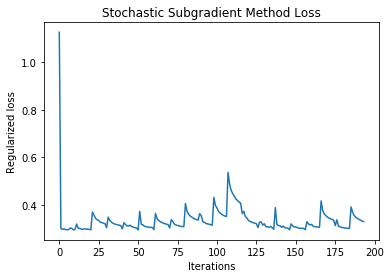

In [28]:
plt.ylabel("Regularized loss")
plt.xlabel("Iterations")
plt.title("Stochastic Subgradient Method Loss")
loss_steps_np = np.array(loss_steps_2)
plt.plot(loss_steps_np[loss_steps_np < 5])
plt.show()

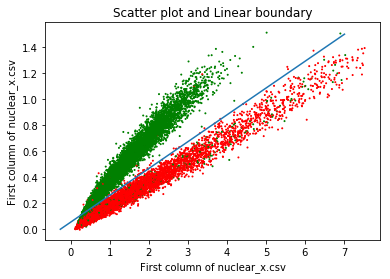

In [16]:
plt.title("Scatter plot and Linear boundary")
plt.xlabel("First column of nuclear_x.csv")
plt.ylabel("First column of nuclear_x.csv")

plt.scatter(df_data[1], df_data[2], color=data_rgb, s=1)
plt.plot([-theta_ssg[0]/theta_ssg[1], -1.5 * theta_ssg[2]/theta_ssg[1] - theta_ssg[0]/theta_ssg[1]], [0, 1.5])
plt.show()

In [29]:
print(theta_ssg)

0    -0.944234
1    -3.484451
2    16.927108
dtype: float64


In [30]:
print(np.min(loss_steps_np))

0.29447129905480324


# Part 5
Stochastic SubGradient has a lower loss as compared to subgradient descent and also converges faster then subgradient for this particular problem instance